## Parse Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def bars(df, **kwargs):
    ax = sns.barplot(data=df,alpha=0.8, **kwargs)
    ax = sns.stripplot(data=df, ax=ax, size=6, dodge=True, legend=False,  edgecolor='black', linewidth=1, **kwargs)
    if 'hue' in kwargs.keys():
      plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    return ax

In [8]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

from pathlib import Path
DRIVE_FOLDER = Path('/content/drive/Shared drives/Student Biolab Zurich/iDEC/iDEC 2024/Lab results/Phage Propagation Assays/20240815_logic_validation/')

d = pd.read_csv(DRIVE_FOLDER / '20240814_qPCR_iDEC.tsv', sep='\t')
d = d[~d.Name.isna()]
df = d
df.loc[df['Name'] == 'S2060 - 2009/1081\t\t', 'Substrate'] = '2009 + weak asyn'


df.loc[df['Name'] == 'S2060 - 2009/1035', 'Substrate'] = '2009 + strong asyn'
df.loc[df['Name'] == "S2060 - 2008/1099\t\t", "Substrate"] = "EGLN3 - MIQDVEP"
df.loc[df['Name'] == "S2060 - 2009/1033", "Substrate"] = "2009 + EGLN3 - wt"
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Include,Color,Pos,Name,Cp,Phage,Date,Substrate
0,True,255,A1,LB,28.73,NaN,15-08-2024,NaN
1,True,255,A2,S2060 - 2008/1099\t\t,18.12,SIAH1,15-08-2024,EGLN3 - MIQDVEP
2,True,255,A3,LB,28.81,NaN,15-08-2024,NaN
3,True,255,A4,S2060 - 2008/1099\t\t,17.86,SIAH1,15-08-2024,EGLN3 - MIQDVEP
4,True,255,A5,LB,29.45,NaN,15-08-2024,NaN
...,...,...,...,...,...,...,...,...
370,True,255,P11,S2208,11.82,SIAH2,15-08-2024,NaN
372,True,255,P13,S2208,11.61,SIAH2,15-08-2024,NaN
374,True,255,P15,S2208,13.29,TadA,15-08-2024,NaN
376,True,255,P17,S2208,12.96,TadA,15-08-2024,NaN


## Compute phage propagation

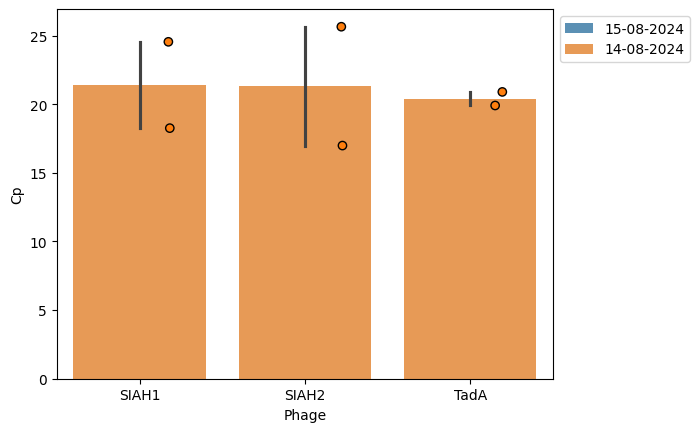

In [12]:
import seaborn as sns

_ = bars(df[df.Name == 'LB'], x='Phage', y='Cp', hue='Date')

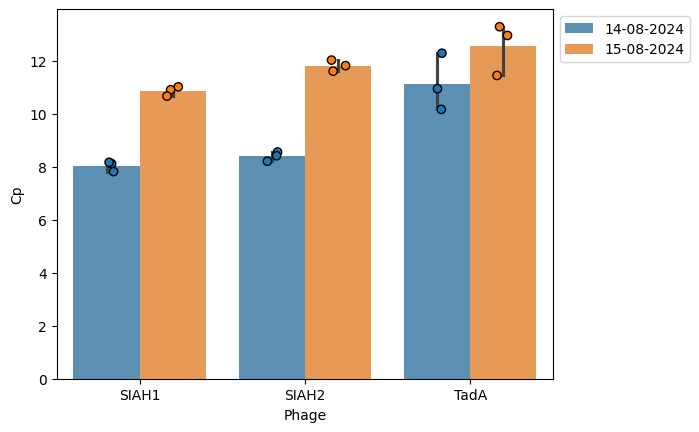

In [11]:
_ = bars(d[d.Name == 'S2208'], x='Phage', y='Cp', hue='Date')

In [14]:
df['cp_init'] = pd.NA
for phage in ['SIAH1', 'SIAH2', 'TadA']:
    df.loc[df.Phage == phage, 'cp_init'] = df[(df.Phage == phage) & (df.Name == 'LB')].Cp.mean()

df['log2_fc'] = d.cp_init - d.Cp
df['fc'] = 2 ** df['log2_fc']

In [15]:
df

,Include,Color,Pos,Name,Cp,Phage,Date,Substrate,cp_init,fc,log2_fc
0,True,255,A1,LB,28.73,NaN,15-08-2024,NaN,<NA>,<NA>,<NA>
1,True,255,A2,S2060 - 2008/1099\t\t,18.12,SIAH1,15-08-2024,EGLN3 - MIQDVEP,21.405,9.747282,3.285
2,True,255,A3,LB,28.81,NaN,15-08-2024,NaN,<NA>,<NA>,<NA>
3,True,255,A4,S2060 - 2008/1099\t\t,17.86,SIAH1,15-08-2024,EGLN3 - MIQDVEP,21.405,11.672163,3.545
4,True,255,A5,LB,29.45,NaN,15-08-2024,NaN,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
370,True,255,P11,S2208,11.82,SIAH2,15-08-2024,NaN,21.32,724.077344,9.5
372,True,255,P13,S2208,11.61,SIAH2,15-08-2024,NaN,21.32,837.531708,9.71
374,True,255,P15,S2208,13.29,TadA,15-08-2024,NaN,20.405,138.620806,7.115
376,True,255,P17,S2208,12.96,TadA,15-08-2024,NaN,20.405,174.248207,7.445


Results

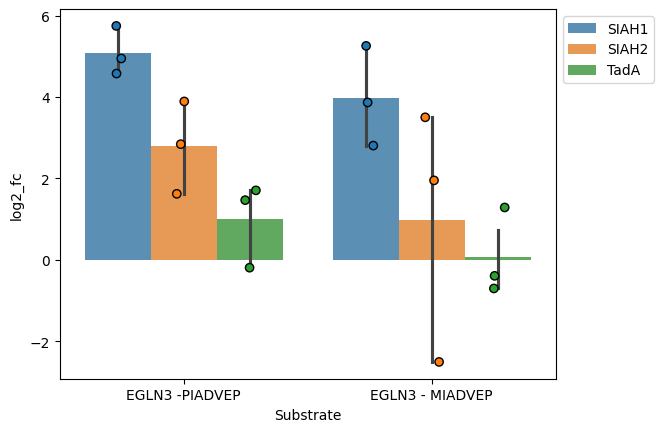

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

_ = bars(df[df.Date == '14-08-2024'], x='Substrate', y='log2_fc', hue='Phage')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'EGLN3 - MIQDVEP'),
  Text(1, 0, 'EGLN3 - peptide'),
  Text(2, 0, 'EGLN3 - MIADVEP'),
  Text(3, 0, 'EGLN3 - FIQDVEP'),
  Text(4, 0, 'EGLN3 - FIADWEP'),
  Text(5, 0, 'EGLN3 - wt'),
  Text(6, 0, '2009 + weak asyn'),
  Text(7, 0, '2009 + strong asyn'),
  Text(8, 0, '2009 + EGLN3 - wt')])

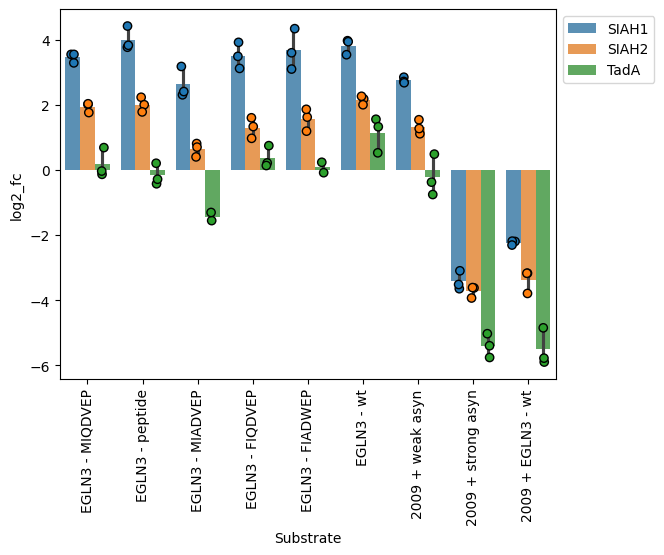

In [21]:

_ = bars(df[df.Date == '15-08-2024'], x='Substrate', y='log2_fc', hue='Phage')
plt.xticks(rotation=90)